#### Assignment on Classification

__Summary__: 
The problem that we will be working on is from the UCI repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. Build prediction models using Logistic Regression, RandomForest, DecisionTrees, and XGBoost. We will provide a table that compares the four algorithms. In addition to the confusion matrix, we will provide precision, recall, accuracy, and F1-Support for each.

__About Dataset__: 
This is a bank marketing dataset where we have 16 Features and 1 Target variable (Yes / No) which indicates whether the customer would accept to open a term deposit account when contacted by the bank marketing / customer service team. 

Refer to above link for more details on the columns and their description.

In [1]:
# Point the directory the file location and supress any warning messages that arise

import os
import warnings

warnings.filterwarnings('ignore')
os.chdir('C:/MSBA/Summer 2020/2205-INSY-5378-Data Science/Assignment 3/Classification')

In [2]:
import pandas as pd
import numpy as np

# set below options to review complete DataFrame in output cells
# Note: load time and processing will be higher  
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', -1)

data_df = pd.read_csv('bank.csv', sep = ';')
data_copy = data_df.copy()
print('Shape: ', data_df.shape)
data_df 

Shape:  (4521, 17)


age            job   marital  education default  balance housing loan  \
0     30   unemployed     married   primary    no      1787     no      no    
1     33   services       married   secondary  no      4789     yes     yes   
2     35   management     single    tertiary   no      1350     yes     no    
3     30   management     married   tertiary   no      1476     yes     yes   
4     59   blue-collar    married   secondary  no      0        yes     no    
5     35   management     single    tertiary   no      747      no      no    
6     36   self-employed  married   tertiary   no      307      yes     no    
7     39   technician     married   secondary  no      147      yes     no    
8     41   entrepreneur   married   tertiary   no      221      yes     no    
9     43   services       married   primary    no     -88       yes     yes   
10    39   services       married   secondary  no      9374     yes     no    
11    43   admin.         married   secondary  no      264      yes     no    
12    36   technician     married   tertiary   no      1109     no      no    
13    20   student        single    secondary  no      502      no      no    
14    31   blue-collar    married   secondary  no      360      yes     yes   
15    40   management     married   tertiary   no      194      no      yes   
16    56   technician     married   secondary  no      4073     no      no    
17    37   admin.         single    tertiary   no      2317     yes     no    
18    25   blue-collar    single    primary    no     -221      yes     no    
19    31   services       married   secondary  no      132      no      no    
20    38   management     divorced  unknown    no      0        yes     no    
21    42   management     divorced  tertiary   no      16       no      no    
22    44   services       single    secondary  no      106      no      no    
23    44   entrepreneur   married   secondary  no      93       no      no    
24    26   housemaid      married   tertiary   no      543      no      no    
25    41   management     married   tertiary   no      5883     no      no    
26    55   blue-collar    married   primary    no      627      yes     no    
27    67   retired        married   unknown    no      696      no      no    
28    56   self-employed  married   secondary  no      784      no      yes   
29    53   admin.         married   secondary  no      105      no      yes   
30    68   retired        divorced  secondary  no      4189     no      no    
31    31   technician     married   secondary  no      171      no      no    
32    59   management     married   secondary  no      42       no      no    
33    32   management     single    tertiary   no      2536     yes     no    
34    49   technician     married   tertiary   no      1235     no      no    
35    42   admin.         divorced  secondary  no      1811     yes     no    
36    78   retired        divorced  primary    no      229      no      no    
37    32   blue-collar    married   secondary  no      2089     yes     no    
38    33   management     married   secondary  no      3935     yes     no    
39    23   services       single    tertiary   no      363      yes     no    
40    38   management     single    tertiary   no      11971    yes     no    
41    36   management     single    tertiary   no      553      no      no    
42    52   blue-collar    married   secondary  no      1117     yes     no    
43    32   technician     married   tertiary   no      396      yes     no    
44    32   technician     single    tertiary   no      2204     yes     no    
45    34   management     single    tertiary   no      872      yes     no    
46    55   blue-collar    married   primary    no      145      no      no    
47    26   blue-collar    married   primary    no      0        yes     no    
48    32   entrepreneur   single    primary    yes    -849      yes     yes   
49    61   admin.         married   unknown    no      4

In [3]:
# we have 17 columns (7 numeric and 10 categorical) and 4521 observations
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# As seen above and below, we have no null values
data_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# Explore the Numeric variables 
# We see a pdays has -1 value in most of the records, which indicates customer was not contacted 
# Would be a good idea to bin age, day (into bi-monthly), p-days (into quarterly)

data_df.describe().T

count         mean          std     min    25%    50%     75%  \
age       4521.0  41.170095    10.576211    19.0    33.0   39.0   49.0     
balance   4521.0  1422.657819  3009.638142 -3313.0  69.0   444.0  1480.0   
day       4521.0  15.915284    8.247667     1.0     9.0    16.0   21.0     
duration  4521.0  263.961292   259.856633   4.0     104.0  185.0  329.0    
campaign  4521.0  2.793630     3.109807     1.0     1.0    2.0    3.0      
pdays     4521.0  39.766645    100.121124  -1.0    -1.0   -1.0   -1.0      
previous  4521.0  0.542579     1.693562     0.0     0.0    0.0    0.0      

              max  
age       87.0     
balance   71188.0  
day       31.0     
duration  3025.0   
campaign  50.0     
pdays     871.0    
previous  25.0

Regarding duration (last contact duration, in seconds) column. 

Note: the duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [6]:
# checking to see if the duration column has zero values, indicating whether the customer was called
duration_check = data_df.loc[data_df['duration'] == 0, 'y']
print(duration_check)

# although this field doesn't have any zero values, 
# I chose to drop this column in the interest of building a true predictive model

data_df = data_df.drop('duration', axis = 1)
print('Shape: ', data_df.shape)

Series([], Name: y, dtype: object)
Shape:  (4521, 16)


 - Correlation matrix shows no signs of multicollinearity 
   (pdays and previous are just # of days representing different aspects)
 - Scatter Plot Matrix also confirms no signs of linear relationship between the input features

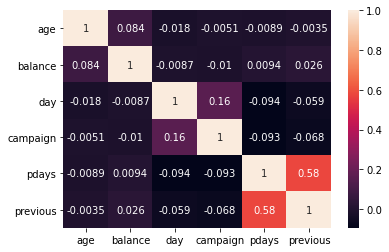

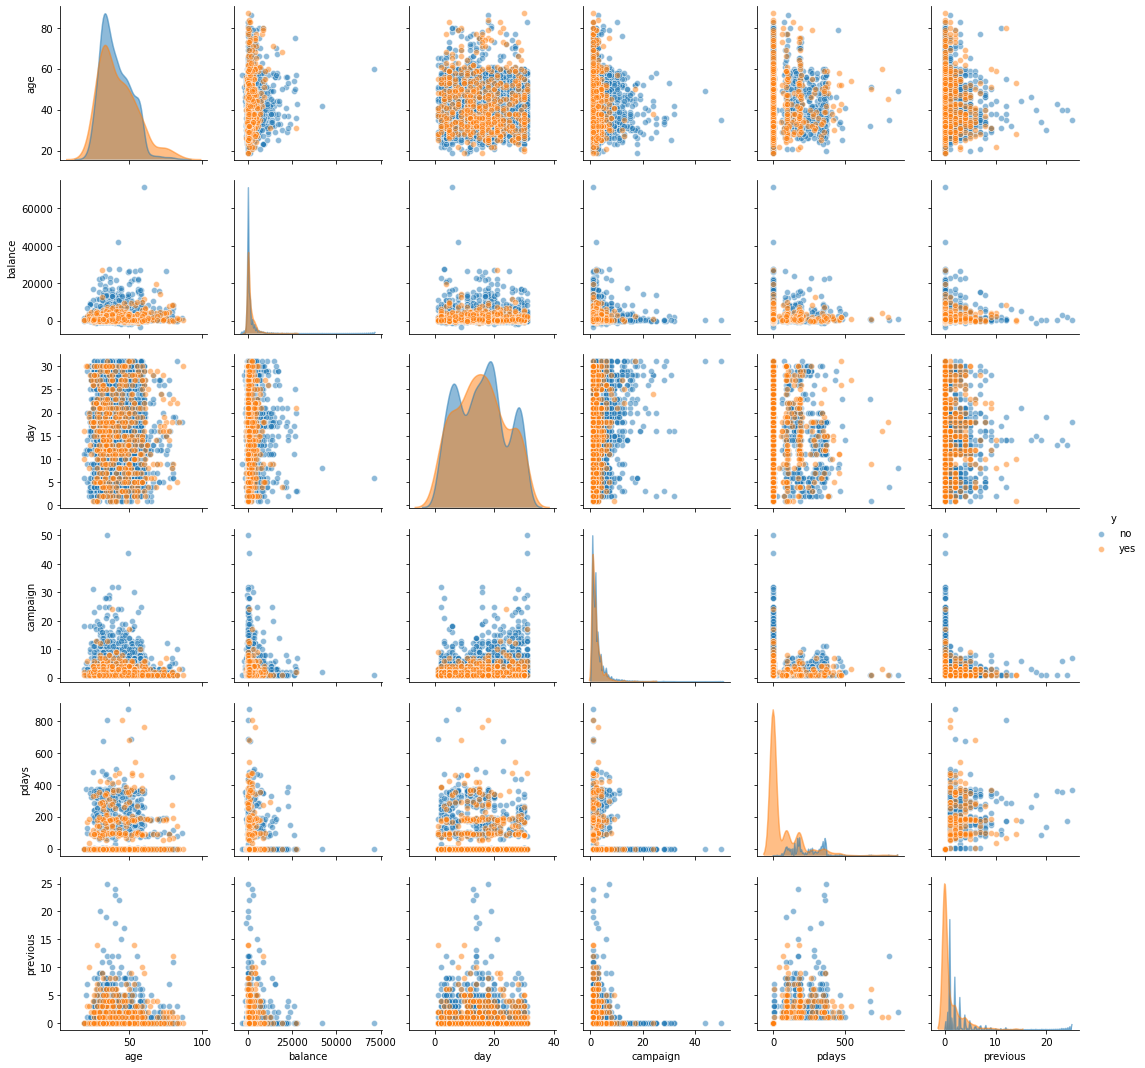

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data_df.corr(), annot=True)
sns.pairplot(data_df, diag_kind ='kde', hue = 'y', diag_kws={'alpha':0.5}, plot_kws={'alpha':0.5})
plt.show()

In [8]:
# review the unique values in all the categorical columns to see if we can one hot encode / label encode them

features_cat = data_df.select_dtypes(include='object').columns

for col in features_cat:
    print('\n{} has {} unique values: \n{}'.format(col, data_df[col].nunique(), data_df[col].unique()))


job has 12 unique values: 
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital has 3 unique values: 
['married' 'single' 'divorced']

education has 4 unique values: 
['primary' 'secondary' 'tertiary' 'unknown']

default has 2 unique values: 
['no' 'yes']

housing has 2 unique values: 
['no' 'yes']

loan has 2 unique values: 
['no' 'yes']

contact has 3 unique values: 
['cellular' 'unknown' 'telephone']

month has 12 unique values: 
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

poutcome has 4 unique values: 
['unknown' 'failure' 'other' 'success']

y has 2 unique values: 
['no' 'yes']


In [9]:
# Encode the target variable 
# We see there is a class imbalance issue (0: 88.5%, 1: 11.5%)

data_df['y'] = data_df['y'].map({"no": 0,'yes':1}) 
data_df['y'].value_counts()

0    4000
1    521 
Name: y, dtype: int64

Encoding below set of features assuming ordinality per domain knowledge

__Note:__ tried one hot encoding but model accuracy was impacted

In [10]:
# ranking single more over married and divorce
data_df['marital'] = data_df['marital'].map({'divorced': 1,'married':2,'single':3}) 

# ranking tertiary as highest
data_df['education'] = data_df['education'].map({'unknown': 1,'primary': 2,'secondary': 3, 'tertiary': 4}) 

# ranking cellular highest as chances of reaching customer are higher 
data_df['contact'] = data_df['contact'].map({'unknown': 1,'telephone': 2,'cellular': 3}) 

# ranking poutcome based on the campaign outcome
data_df['poutcome'] = data_df['poutcome'].map({'failure': 1, 'unknown': 2,'other': 3,'success': 4}) 

# ranking jobs as per common knowledge
job_rank = {'unemployed': 1, 'unknown': 2, 'student': 3, 'retired': 4, 'housemaid': 5,  
            'blue-collar': 6, 'self-employed': 7, 'services': 8, 'admin.': 9,  
            'technician': 10, 'entrepreneur': 11, 'management': 12}

data_df['job'] = data_df['job'].map(job_rank) 

Binning below set of features for one hot encoding, as label encoding them doesnt make sense due to ordinality

In [11]:
# bin months of the year as per quarters 
month_quarter = {'jan': 1, 'feb':1, 'mar': 1, 
                 'apr': 2, 'may':2, 'jun': 2, 
                 'jul': 3, 'aug':3, 'sep': 3,
                 'oct': 4, 'nov':4, 'dec': 4}

data_df['month'] = data_df['month'].map(month_quarter).astype('category') 

# bin the days of month into two (bi-monthly)
data_df['day'] = pd.cut(data_df['day'], [1,15,31], include_lowest = True)

# bin pdays quarterly 
data_df['pdays'] = pd.cut(data_df['pdays'], [-1,0,90,181,273,365], include_lowest = True)

# bin age into categories -> single, married, family, independent (children out of home), retired
data_df['age'] = pd.cut(data_df['age'], [18,24,32,50,60,100], include_lowest = True)

In [12]:
# one hot encode all the categorical variables and the ones which were binned above
# we now have 24 features for our model training 

data_one_hot = pd.get_dummies(data_df, drop_first = True)
print('\nShape: ', data_one_hot.shape)

data_one_hot


Shape:  (4521, 24)


job  marital  education  balance  contact  campaign  previous  poutcome  \
0     1    2        2          1787     3        1         0         2          
1     8    2        3          4789     3        1         4         1          
2     12   3        4          1350     3        1         1         1          
3     12   2        4          1476     1        4         0         2          
4     6    2        3          0        1        1         0         2          
5     12   3        4          747      3        2         3         1          
6     7    2        4          307      3        1         2         3          
7     10   2        3          147      3        2         0         2          
8     11   2        4          221      1        2         0         2          
9     8    2        2         -88       3        1         2         1          
10    8    2        3          9374     1        1         0         2          
11    9    2        3          264      3        2         0         2          
12    10   2        4          1109     3        2         0         2          
13    3    3        3          502      3        1         0         2          
14    6    2        3          360      3        1         1         1          
15    12   2        4          194      3        2         0         2          
16    10   2        3          4073     3        5         0         2          
17    9    3        4          2317     3        1         2         1          
18    6    3        2         -221      1        1         0         2          
19    8    2        3          132      3        1         1         3          
20    12   1        1          0        3        2         0         2          
21    12   1        4          16       3        3         0         2          
22    8    3        3          106      1        2         0         2          
23    11   2        3          93       3        2         0         2          
24    5    2        4          543      3        3         0         2          
25    12   2        4          5883     3        2         0         2          
26    6    2        2          627      1        1         0         2          
27    4    2        1          696      2        1         2         1          
28    7    2        3          784      3        2         0         2          
29    9    2        3          105      3        2         0         2          
30    4    1        3          4189     2        2         0         2          
31    10   2        3          171      3        3         0         2          
32    12   2        3          42       3        1         0         2          
33    12   3        4          2536     3        6         0         2          
34    10   2        4          1235     3        3         0         2          
35    9    1        3          1811     1        1         0         2          
36    4    1        2          229      2        1         0         2          
37    6    2        3          2089     3        1         0         2          
38    12   2        3          3935     3        1         2         1          
39    8    3        4          363      1        18        0         2          
40    12   3        4          11971    1        2         3         1          
41    12   3        4          553      3        2         0         2          
42    6    2        3          1117     3        1         0         2          
43    10   2        4          396      3        3         0         2          
44    10   3        4          2204     3        4         0         2          
45    12   3        4          872      1        2         0         2          
46    6    2        2          145      2        3         2         3          
47    6    2        2          0        1        1         0         2          
48    11   3        2         -849   

In [13]:
# review the 24 variables and column datatype

data_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 24 columns):
job                     4521 non-null int64
marital                 4521 non-null int64
education               4521 non-null int64
balance                 4521 non-null int64
contact                 4521 non-null int64
campaign                4521 non-null int64
previous                4521 non-null int64
poutcome                4521 non-null int64
y                       4521 non-null int64
age_(24.0, 32.0]        4521 non-null uint8
age_(32.0, 50.0]        4521 non-null uint8
age_(50.0, 60.0]        4521 non-null uint8
age_(60.0, 100.0]       4521 non-null uint8
default_yes             4521 non-null uint8
housing_yes             4521 non-null uint8
loan_yes                4521 non-null uint8
day_(15.0, 31.0]        4521 non-null uint8
month_2                 4521 non-null uint8
month_3                 4521 non-null uint8
month_4                 4521 non-null uint8
pdays_(0.0, 9

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# build the X (features) and y (target) 
features = data_one_hot.drop('y', axis = 1)     # note that features is dataframe
target = data_one_hot['y']                      # note that target is series

# use SMOTE over sampler to handle class imbalance 
# Tried using class weights option, but results were not as expected

oversampler = SMOTE(random_state = 337)
features_os, target_os = oversampler.fit_sample(features, target)
print('Binary counts of over sampled target set:{} \n'.format(np.bincount(target_os)))

# Perform a stratified split on the target variable with test size as 20% 
# Stratified split to maintain the same target ratio in train and test sets

x_train, x_test, y_train, y_test = \
                    train_test_split(features_os, target_os, test_size = 0.20, stratify = target_os, random_state = 32)

print('x_train shape :', x_train.shape)
print('x_test shape  :', x_test.shape)
print('y_train shape and target counts: {} {}'.format(y_train.shape, np.bincount(y_train)))
print('y_test shape and target counts: {} {}'.format(y_test.shape, np.bincount(y_test)))

Binary counts of over sampled target set:[4000 4000] 

x_train shape : (6400, 23)
x_test shape  : (1600, 23)
y_train shape and target counts: (6400,) [3200 3200]
y_test shape and target counts: (1600,) [800 800]


Below function is for displaying the metrics of classification model: 
 - Display the confusion matrix to view the TP, TN, FP, FN counts 
 - Plot the Precision Recall curve to visualize the trade-off between Precision-Recall
 - Calculate and display the Area Under Curve (AUC)

In [15]:
def report_metrics(y_test, y_pred, y_pred_prob):
    #print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_pred, target_names = ['No', 'Yes']))
     
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    area = auc(recall, precision)

    plt.plot(recall, precision, label = 'P-R curve')
    plt.legend(loc = 'lower left')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.1, 1.0])
    plt.ylim([0.1, 1.1])
    plt.title('P-R curve with Area Under Curve: {:0.2f}'.format(area))
    plt.show()

Build baseline models to check the model accuracy with the preprocessed data
 - Fit on the train data
 - Score on both training and test data to determine model accuracy on both datasets
 - Predict on test dataset for Target predictions and probabilities
 - Pass the actual, predicted and predicted probabilities to metrics reporting function
 - Return all the built base line models

In [16]:
def models_baseline(x_train, y_train, x_test, y_test, models): 
    base_models = []
    for model_name, model, parameter in models:               
        model_base = model
        model_base.fit(x_train, y_train)

        print('{}: '.format(model_name))
        print('Accuracy on Training set: {:.3f}'.format(model_base.score(x_train, y_train)))
        print('Accuracy on Test set: {:.3f}'.format(model_base.score(x_test, y_test)))

        y_pred = model_base.predict(x_test)
        y_pred_prob = model_base.predict_proba(x_test)[:, 1]

        report_metrics(y_test, y_pred, y_pred_prob)
        base_models.append(model_base)
    
    return(base_models)

 - Import all necessary libraries and instantiate relevant models
 - Setup parameter space -> these will be used later for fine tuning (using hyper parameters), once baseline model is built

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

model_lr = LogisticRegression(random_state = 337, max_iter = 10000)
model_dt = DecisionTreeClassifier(random_state = 337)
model_rfc = RandomForestClassifier(n_jobs = -1, random_state = 337)
model_xgb = XGBClassifier(n_jobs = -1, random_state = 337, verbosity = 0)

lr_param = {'C': np.logspace(-5, 8, 15), 'penalty': ['l1','l2'], 'solver': ['liblinear']}

dt_param = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(4,10,1))}

rfc_param = {'n_estimators': list(range(10,101,10)), 'max_features': list(range(5,24,1)), 
             'criterion': ['gini', 'entropy'], 'oob_score': [True, False], 'max_depth': list(range(5,9,1))}

xgb_param = {'n_estimators': list(range(10,101,10)), 'learning_rate': np.linspace(0.01,0.5,10),
             'max_depth': list(range(3,5,1))}

models = [('Logistic Regression', model_lr, lr_param), 
          ('Decision Tree', model_dt, dt_param), 
          ('Random Forest', model_rfc, rfc_param), 
          ('XGBoost', model_xgb, xgb_param)]

Summary for Baseline models: 

Logistic Regression: 
Accuracy on Training set: 0.861
Accuracy on Test set: 0.852

Confusion Matrix:
 [[720  80]
 [157 643]]

Classification Report:
                precision    recall  f1-score   support

          No       0.82      0.90      0.86       800
         Yes       0.89      0.80      0.84       800

    accuracy                           0.85      1600
   macro avg       0.86      0.85      0.85      1600
weighted avg       0.86      0.85      0.85      1600



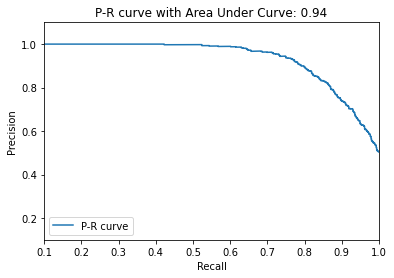

Decision Tree: 
Accuracy on Training set: 1.000
Accuracy on Test set: 0.866

Confusion Matrix:
 [[678 122]
 [ 93 707]]

Classification Report:
                precision    recall  f1-score   support

          No       0.88      0.85      0.86       800
         Yes       0.85      0.88      0.87       800

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



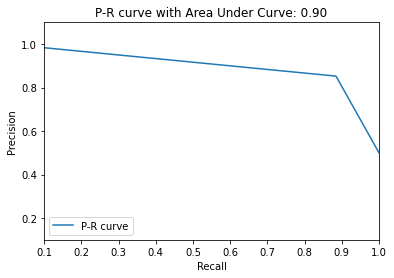

Random Forest: 
Accuracy on Training set: 1.000
Accuracy on Test set: 0.904

Confusion Matrix:
 [[730  70]
 [ 84 716]]

Classification Report:
                precision    recall  f1-score   support

          No       0.90      0.91      0.90       800
         Yes       0.91      0.90      0.90       800

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



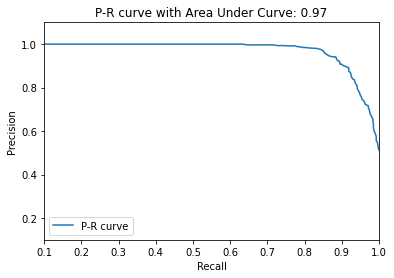

XGBoost: 
Accuracy on Training set: 0.979
Accuracy on Test set: 0.909

Confusion Matrix:
 [[731  69]
 [ 76 724]]

Classification Report:
                precision    recall  f1-score   support

          No       0.91      0.91      0.91       800
         Yes       0.91      0.91      0.91       800

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



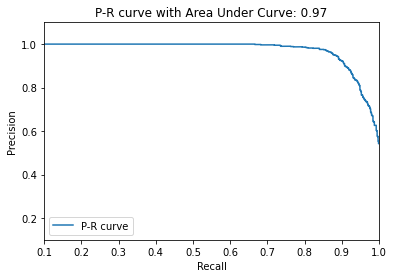

In [18]:
# Build the necessary models by calling models_baseline function
# Pass the X and y values for both train and test
# Models parameter has below: 
  # Model name - text 
  # Model instantiator 
  # Model parameters (for hyper tuning)
    
print('Summary for Baseline models: \n')
base_models = models_baseline(x_train.values, y_train, x_test.values, y_test, models)

# due to binning, dataframe columns have these values in column names "[, ] or <"
# XGBoost is throwing error -> feature_names must be string, and may not contain [, ] or <
# hence passing the X dataframe as arrays instead 

__Observations on Baseline models__: 
 - Overall accuracies are decent
 - Scope for improvement on F1 score (Precision / Recall)
 - Overfitting observed in Decision Tree, Random Forest and XGBoost models 

In [19]:
# let us look at the depths of the trees used in Decision Tree and Random Forest
# This could be one of the reason for overfitting 
# Need to explore further on how to view the depth of trees built by XGBoost model 

print('Decision Tree depth:', base_models[1].tree_.max_depth)
print('Random Forest Average Tree depth:', 
      round(np.mean([estimator.tree_.max_depth for estimator in base_models[2].estimators_])))

# We see that tree pruning is required to avoid overfitting 

Decision Tree depth: 26
Random Forest Average Tree depth: 25


Function for tuning hyper parameters on various models using randomized search cross validation:
 - Perform a Randomized Search 5 fold cross validation on the training dataset
 - Optimize on accuracy score
 - Calculate the accuracy for both train and test records 
 - Predict on the test dataset and pass the actual and predicted values for metrics reporting

In [20]:
def models_tuned(x_train, y_train, x_test, y_test, models): 
    tuned_models = []
    for model_name, model, parameter in models: 
        # Create the RandomizedSearchCV object: model_cv
        model_cv = RandomizedSearchCV(estimator = model, param_distributions = parameter, 
                                      cv = 5, random_state = 32)
        # Fit to the training set
        model_cv.fit(x_train, y_train)
        
        # Compute and print the Accuracy metric on training and test sets
        print('{}:'.format(model_name))
        print("Tuned best Hyper Parameters: \n{}".format(model_cv.best_params_))
        print("\nAccuracy on Training set: {:.3f}".format(model_cv.score(x_train, y_train)))
        print("Accuracy on Test set: {:.3f}".format(model_cv.score(x_test, y_test)))

        # Predit on the test set using best parameters 
        y_pred = model_cv.predict(x_test)
        y_pred_prob = model_cv.predict_proba(x_test)[:,1]

        # Generate the metrics to evaluate model performance
        report_metrics(y_test, y_pred, y_pred_prob)
        
        # Append the built models into a list for future reference
        tuned_models.append(model_cv)
        
    return(tuned_models)

Summary for Hyper Parameters tuned models: 

Logistic Regression:
Tuned best Hyper Parameters: 
{'solver': 'liblinear', 'penalty': 'l1', 'C': 3.727593720314938}

Accuracy on Training set: 0.869
Accuracy on Test set: 0.856

Confusion Matrix:
 [[721  79]
 [151 649]]

Classification Report:
                precision    recall  f1-score   support

          No       0.83      0.90      0.86       800
         Yes       0.89      0.81      0.85       800

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



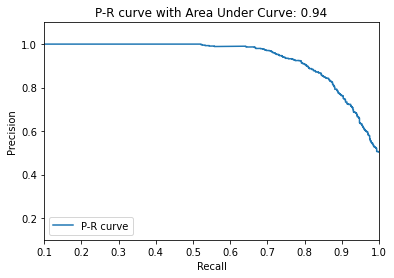

Decision Tree:
Tuned best Hyper Parameters: 
{'max_depth': 9, 'criterion': 'entropy'}

Accuracy on Training set: 0.899
Accuracy on Test set: 0.843

Confusion Matrix:
 [[704  96]
 [156 644]]

Classification Report:
                precision    recall  f1-score   support

          No       0.82      0.88      0.85       800
         Yes       0.87      0.81      0.84       800

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



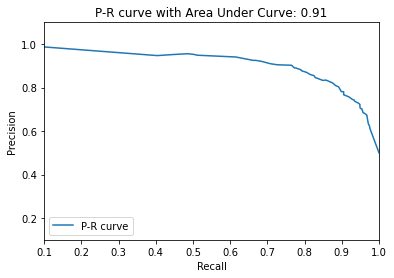

Random Forest:
Tuned best Hyper Parameters: 
{'oob_score': True, 'n_estimators': 100, 'max_features': 10, 'max_depth': 8, 'criterion': 'gini'}

Accuracy on Training set: 0.915
Accuracy on Test set: 0.874

Confusion Matrix:
 [[708  92]
 [110 690]]

Classification Report:
                precision    recall  f1-score   support

          No       0.87      0.89      0.88       800
         Yes       0.88      0.86      0.87       800

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



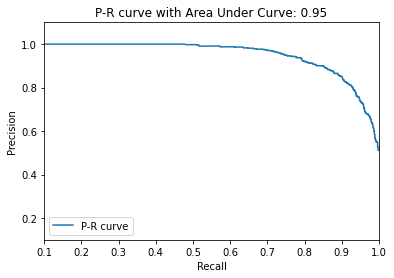

XGBoost:
Tuned best Hyper Parameters: 
{'n_estimators': 70, 'max_depth': 3, 'learning_rate': 0.5}

Accuracy on Training set: 0.925
Accuracy on Test set: 0.894

Confusion Matrix:
 [[736  64]
 [106 694]]

Classification Report:
                precision    recall  f1-score   support

          No       0.87      0.92      0.90       800
         Yes       0.92      0.87      0.89       800

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



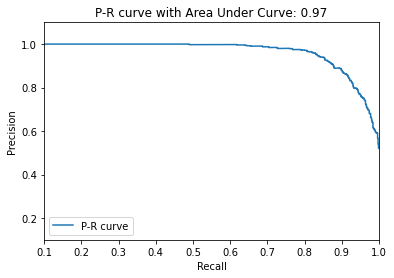

In [21]:
# Tune all the models as per hyper parameters defined previously by calling models_tuned function 

print('Summary for Hyper Parameters tuned models: \n')
tuned_models = models_tuned(x_train.values, y_train, x_test.values, y_test, models)

# due to binning, dataframe columns have these values in column names "[, ] or <"
# XGBoost is throwing error -> feature_names must be string, and may not contain [, ] or <
# hence passing the dataframe as arrays instead 

__Observations on hyper parameter tuned models__: 
 - Improved on F1 scores for class of interest (Yes) 
 - Overfitting on all the models were controlled and tuned models were generalized 
 - Considering the F1 score (precision and recall) & Accuracy, clearly XGBoost is the best fit model

__Logistic Regression__: 

__Baseline Model__: 
 - Accuracy on Training set: 0.861
 - Accuracy on Test set: 0.852

Confusion Matrix:

 [[720  80]

 [157 643]]

Classification Report:

                precision    recall  f1-score   support
          No       0.82      0.90      0.86       800
         Yes       0.89      0.80      0.84       800
    accuracy                           0.85      1600

__Tuned Model__:
 - Accuracy on Training set: 0.869
 - Accuracy on Test set: 0.856

Confusion Matrix:

 [[721  79]
 
 [151 649]]

Classification Report:

                precision    recall  f1-score   support
          No       0.83      0.90      0.86       800
         Yes       0.89      0.81      0.85       800
    accuracy                           0.86      1600

*****************************************************************

__Decision Tree__:

__Baseline Model__:
 - Accuracy on Training set: 1.000
 - Accuracy on Test set: 0.866

Confusion Matrix:

 [[678 122]
 
 [ 93 707]]

Classification Report:

                precision    recall  f1-score   support
          No       0.88      0.85      0.86       800
         Yes       0.85      0.88      0.87       800
    accuracy                           0.87      1600

__Tuned Model__:
 - Accuracy on Training set: 0.899
 - Accuracy on Test set: 0.843   

Confusion Matrix:

 [[704  96]
 
 [156 644]]

Classification Report:

                precision    recall  f1-score   support
          No       0.82      0.88      0.85       800
         Yes       0.87      0.81      0.84       800
    accuracy                           0.84      1600

*****************************************************************

__Random Forest__:

__Baseline Model__: 
 - Accuracy on Training set: 1.000
 - Accuracy on Test set: 0.904

Confusion Matrix:

 [[730  70]
 
 [ 84 716]]

Classification Report:

                precision    recall  f1-score   support
          No       0.90      0.91      0.90       800
         Yes       0.91      0.90      0.90       800
    accuracy                           0.90      1600

__Tuned Model__:
 - Accuracy on Training set: 0.915
 - Accuracy on Test set: 0.874

Confusion Matrix:

 [[708  92]
 
 [110 690]]

Classification Report:

                precision    recall  f1-score   support
          No       0.87      0.89      0.88       800
         Yes       0.88      0.86      0.87       800
    accuracy                           0.87      1600

*****************************************************************
__XGBoost__:

__Baseline Model__: 
 - Accuracy on Training set: 0.979
 - Accuracy on Test set: 0.909

Confusion Matrix:

 [[731  69]
 
 [ 76 724]]

Classification Report:

                precision    recall  f1-score   support
          No       0.91      0.91      0.91       800
         Yes       0.91      0.91      0.91       800
    accuracy                           0.91      1600

__Tuned Model__: 
 - Accuracy on Training set: 0.925
 - Accuracy on Test set: 0.894

Confusion Matrix:

 [[736  64]
 
 [106 694]]

Classification Report:

                precision    recall  f1-score   support
          No       0.87      0.92      0.90       800
         Yes       0.92      0.87      0.89       800
    accuracy                           0.89      1600

*****************************************************************